Importing the necessary libraries
1. Prophet Library
2. Pandas Library
3. Numpy Library
4. Matplotlib Library

In [2]:
import pandas as pd
import numpy as np
import prophet as py
from prophet import Prophet
import matplotlib.pyplot as plt

f:\CS Projects\Energy Consumtion Prediction\venv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


Loading the data and seeing it's head. On top of that, We'll be plotting the data

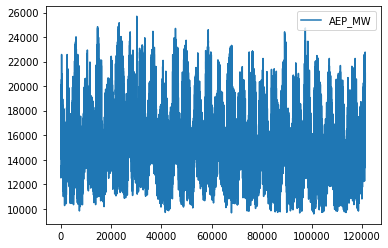

In [3]:
df = pd.read_csv('AEP_hourly.csv')
df.head()
# df.describe()
df.plot()
plt.show()

Preparaing the datasets in terms of "ds" & "y" axis. Because prophet can only take this form of dataset columns.

In [4]:
# Prepare expected model data
# df['ds'] = df['Date']

df.columns = ['ds', 'y']
df['ds'] = pd.to_datetime(df['ds'])
df.head()

,ds,y
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0


Fitting the model

In [5]:
m = Prophet()
m.fit(df)

INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Prediction is being made

In [6]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
121629,2019-07-30
121630,2019-07-31
121631,2019-08-01
121632,2019-08-02
121633,2019-08-03


In [7]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
121629,2019-07-30,16651.227894,13690.050468,19660.116982
121630,2019-07-31,16446.175618,13621.738764,19426.012048
121631,2019-08-01,16508.671031,13505.203985,19624.198034
121632,2019-08-02,16400.608817,13557.949407,19361.768133
121633,2019-08-03,15703.685922,12883.361894,18778.959638


Drawing the new figure

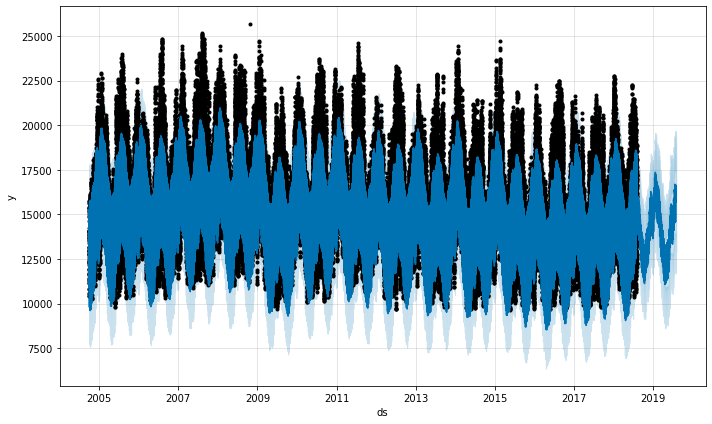

In [8]:
fig = m.plot(forecast)

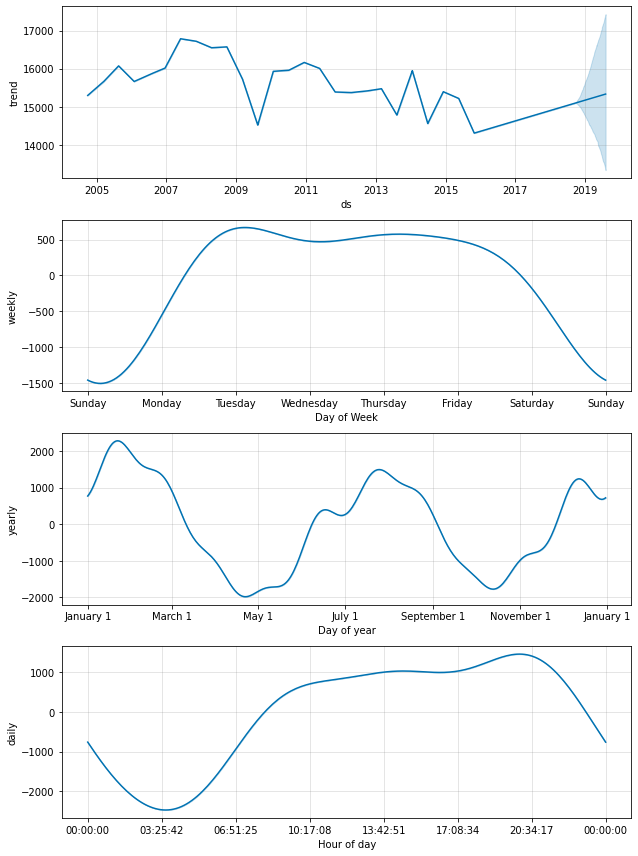

In [9]:
fig2 = m.plot_components(forecast)

In [10]:
forecast.to_csv('AEP_forecast.csv')